# Predictive Model for Development of Liver Disease 

## Objective

Liver Cirrhosis is one of the leading causes of death among adults over the age of 40, accounting for around 52,000 deaths across the nation. The development of damaged liver tissue can be attributed to years of prolonged alcohohl abuse and the effects in most cases are irreversible. A wider issue for doctor's is detecting early stages of Liver Cirirrhosis development with patients as to notify patients earlier. 

The earlier patients know about their condition and the effects of any further damage, the patient may be less likely to develop an irreveersibly damaged liver. The progression of the disease begins with an Early Stage (1) where the liver is inflamed due to fatty liver, hepatitits or other causes. Stage (2) occurs when liver scarring begins to cause chronic inflamation further resulting in scarred tissue. At this stage, blood flow can become restricted to the liver. Stage (3) is classified as cirrhosis which is caused by severe liver damage, at this stage, you may experience further symptoms of liver weakness. Stage (4) occurs when the liver fails to operate normally, the liver cannot process toxins or drugs, and they will inevitably build up in your body. 

This model has been prepared using 18 independent features (X) ~ see data.head below for further information and 1 dependent feature (Y) ~ Liver Disease Stage. 

| Featured Variables| Description of Correlation to LC |
| --- | --- | 
| `N-Days` | Number of Days between Regestration and Analysis |
| `Status` | Status of Patient (Death (D), Censored (C,CL)) | 
| `Drug` | D-penicillamine (D.p) or Placebo (P) |
| `Sex` | Male or Female | 
| `Ascites` | Presence of Fluid Buildup in Abdomen (Y/N) | 
| `Hepatomegaly` | Liver Enlarged (Y/N) |  
| `Spiders` | Prescense of Visual Spidering on Liver Tissue (Y/N) | 
| `Edema` | Presence of Fluid Buildup in Legs (Y/N)|  
| `Blirubin` | Increased Levels in Blood (mg/dl) |  
| `Cholestrol` | Decreased Levels in blood (mg/dl) |  
| `Albumin` | Decreased Levels in Blood (g/dl) |  
| `Copper` | Increased Levels in Blood (ug/day) |  
| `Alk_Phos` | Increased Levels of Alklaline Phosphotase in blood (U/L) |  
| `SGOT` | >2 High indication of LC Development (U/mL) |  
| `Tryglicerides` | Increased Levels of ALT/ATS (mg/dl) |  
| `Platelets` | Decreased Levels of Platelet Count (mL/1000) |  
| `Prothrombin` | Time of Prothrombin (s)  |  
| `Stage` | Stage of LD Development (1,2,3,4) // 4 being Cirrhosis |  

<br>

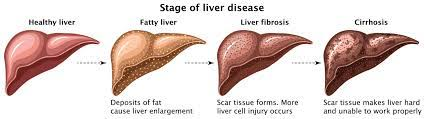

### 1. Import Packages and Read Data

In [2]:
#importing packages --  plan to test the effectiveness of each algorithm on the model and select the one that optimizes for accuracy on the ROC curve 

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

from colorama import Fore, Back, Style
from yellowbrick.classifier import ROCAUC  

sns.set_style('dark')

In [3]:
df = pd.read_csv('cirrhosis.csv')
df.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.Age = df.Age/365
df = df.drop(['ID','N_Days'],axis=1)

In [5]:
df.head()

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D,D-penicillamine,58.805479,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,C,D-penicillamine,56.484932,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,D,D-penicillamine,70.120548,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,D,D-penicillamine,54.778082,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,CL,Placebo,38.131507,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [6]:
df['Drug'].value_counts()

D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64

In [6]:
df.shape

(418, 18)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         418 non-null    object 
 1   Drug           312 non-null    object 
 2   Age            418 non-null    float64
 3   Sex            418 non-null    object 
 4   Ascites        312 non-null    object 
 5   Hepatomegaly   312 non-null    object 
 6   Spiders        312 non-null    object 
 7   Edema          418 non-null    object 
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    284 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         310 non-null    float64
 12  Alk_Phos       312 non-null    float64
 13  SGOT           312 non-null    float64
 14  Tryglicerides  282 non-null    float64
 15  Platelets      407 non-null    float64
 16  Prothrombin    416 non-null    float64
 17  Stage          412 non-null    float64
dtypes: float64

### 2. Missing Value Treatment | Label Encoding | Prepare Data for Modeling

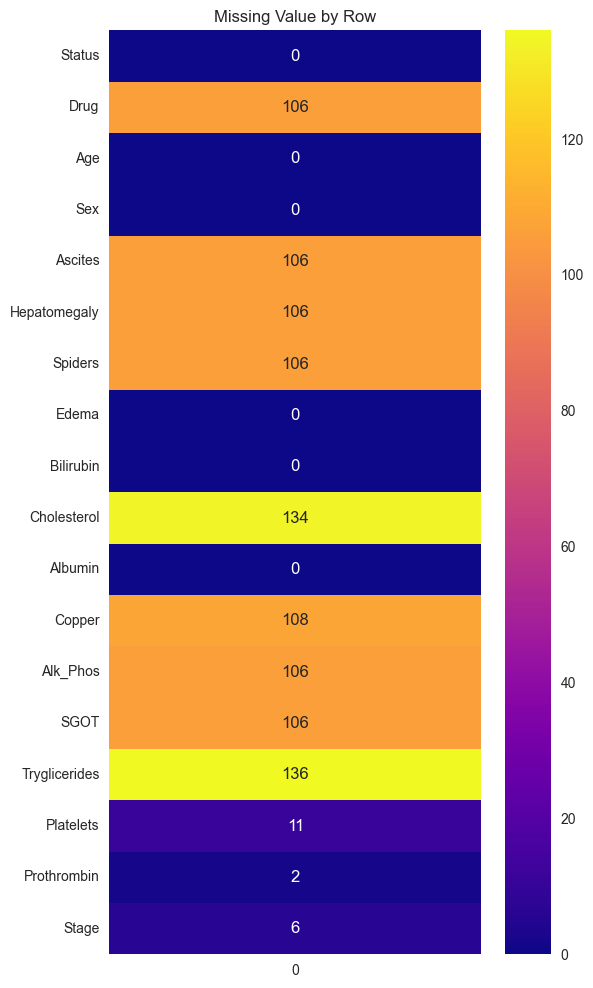

In [11]:
plt.figure(figsize=(6,12))
plt.title('Missing Value by Row')
ax = sns.heatmap(df.isna().sum().to_frame(), annot = True, fmt = 'd', cmap = 'plasma')
plt.show()

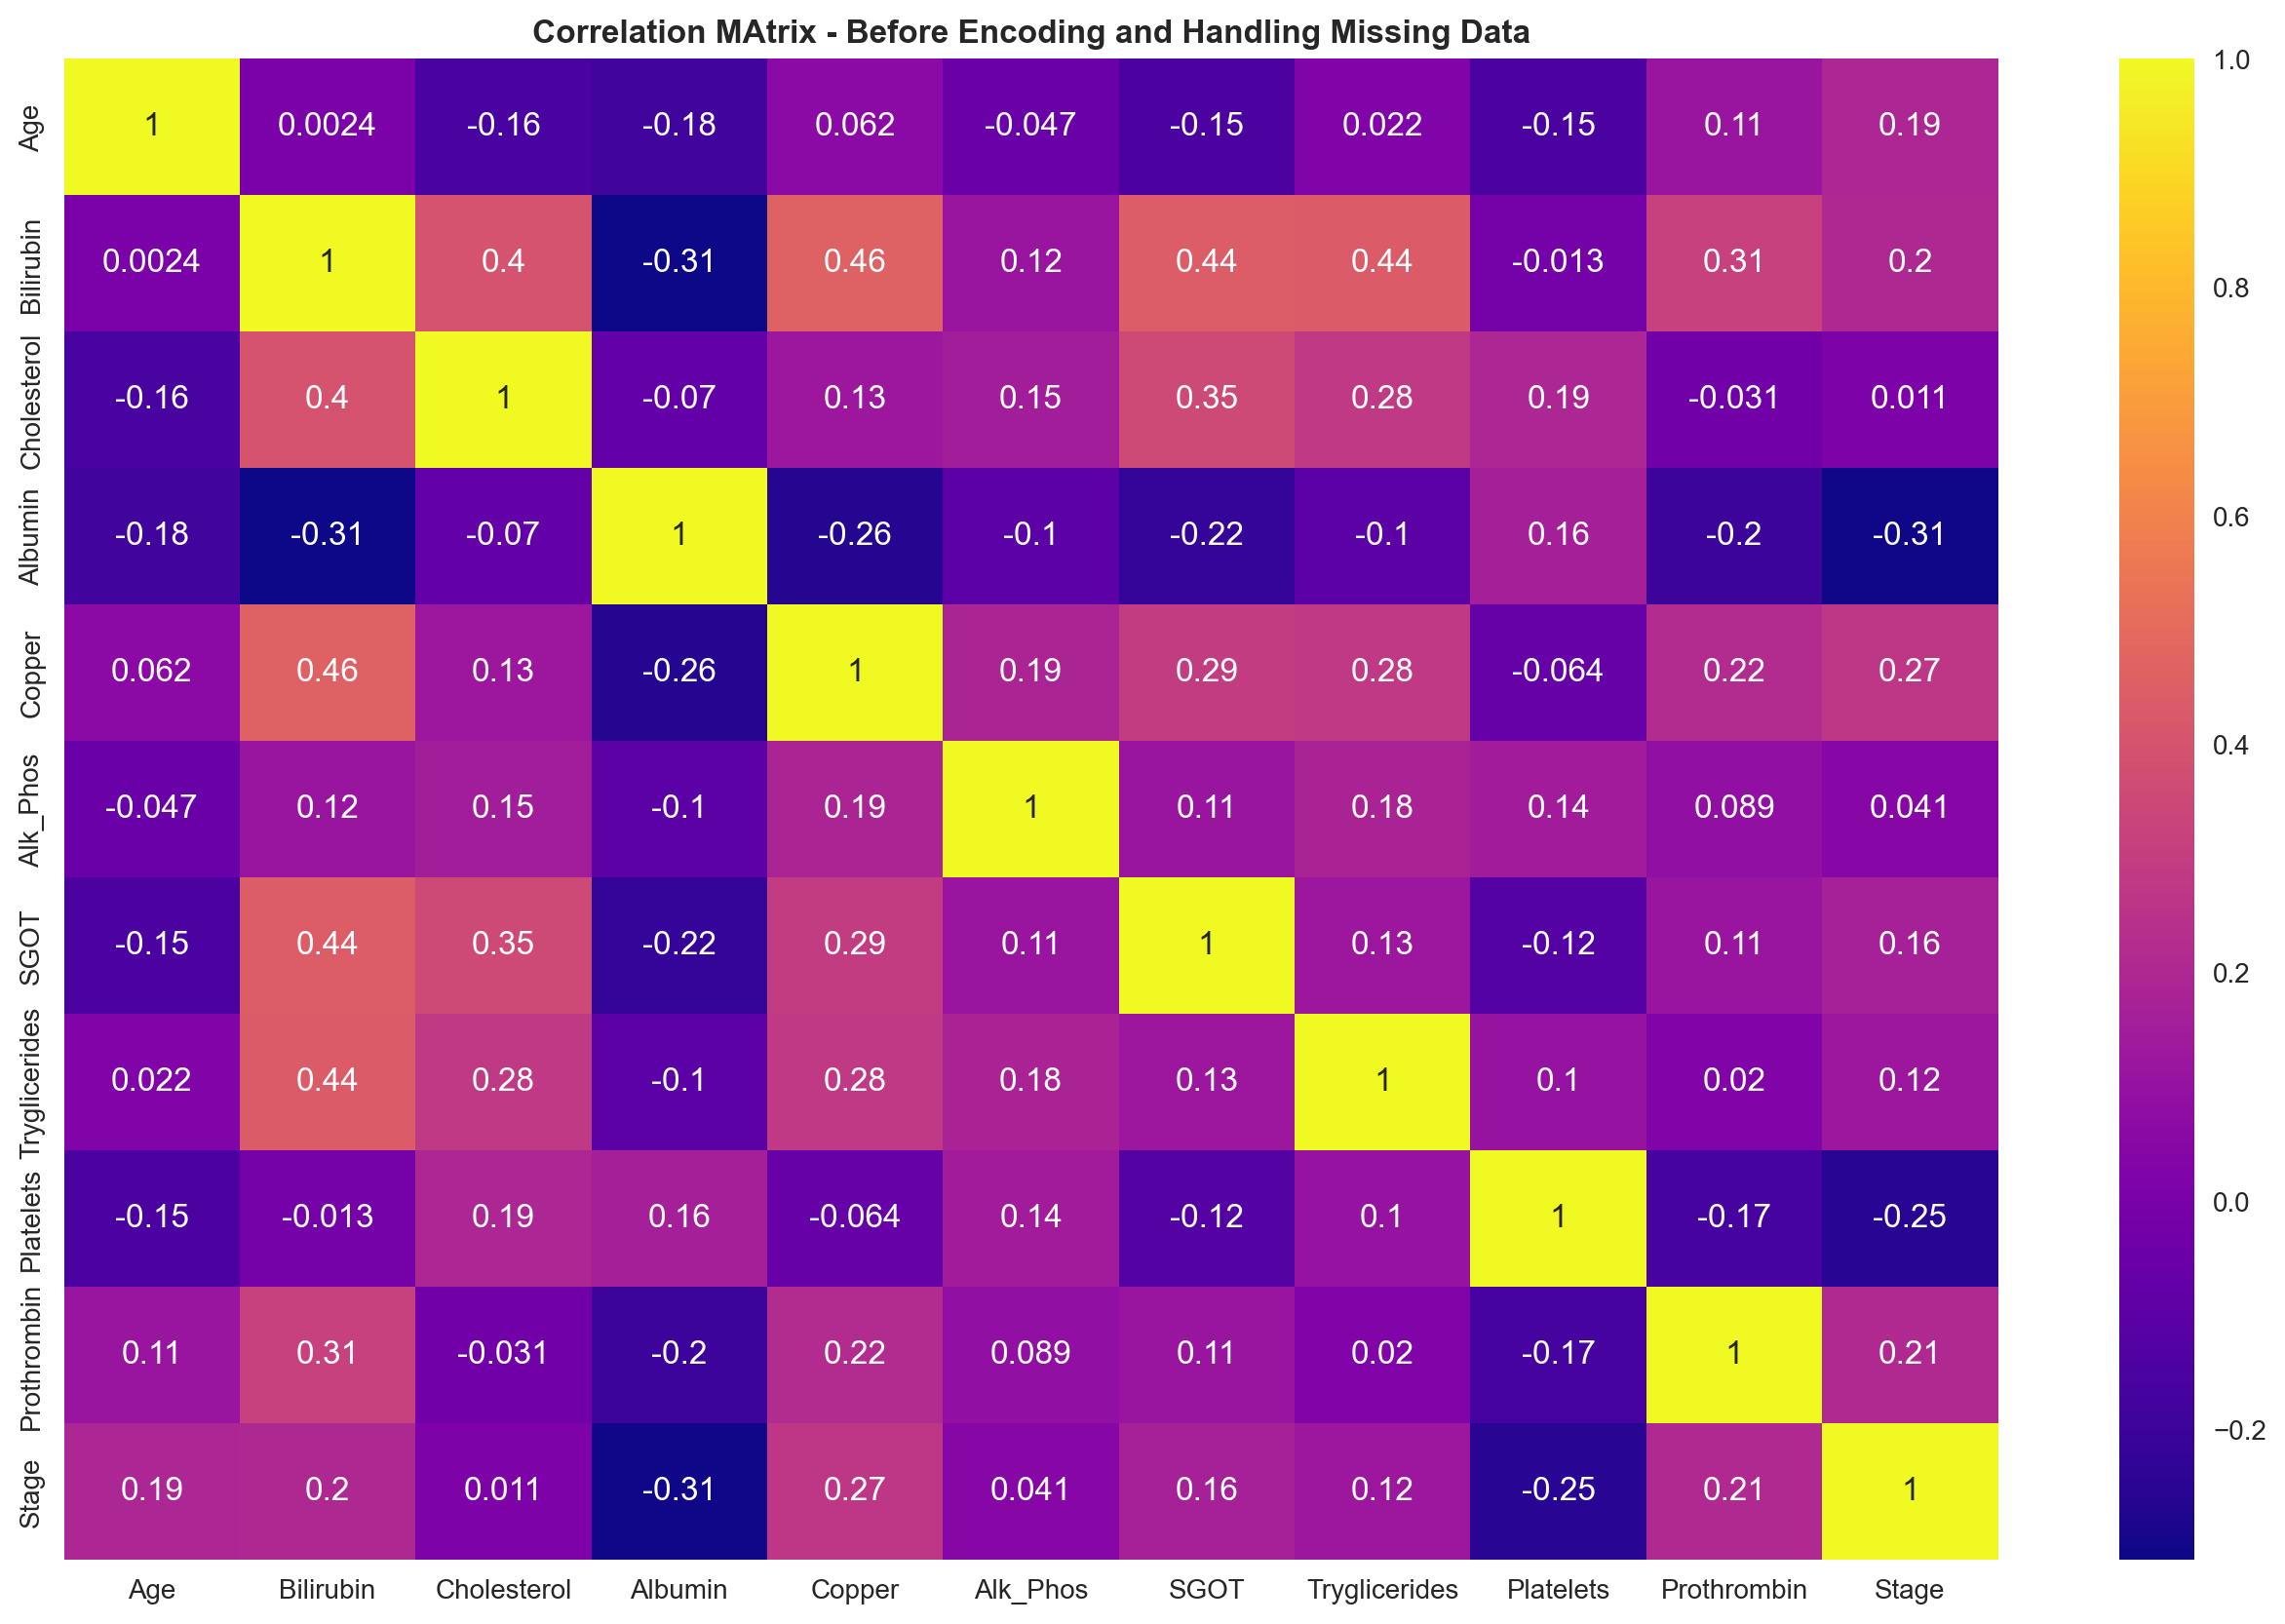

In [12]:
plt.figure(figsize=(16,10), dpi = 200)
ax = plt.axes()
sns.heatmap(df.corr(), annot = True, cmap = 'plasma', ax = ax)
ax.set_title('Correlation MAtrix - Before Encoding and Handling Missing Data', weight = 'bold')
plt.show()

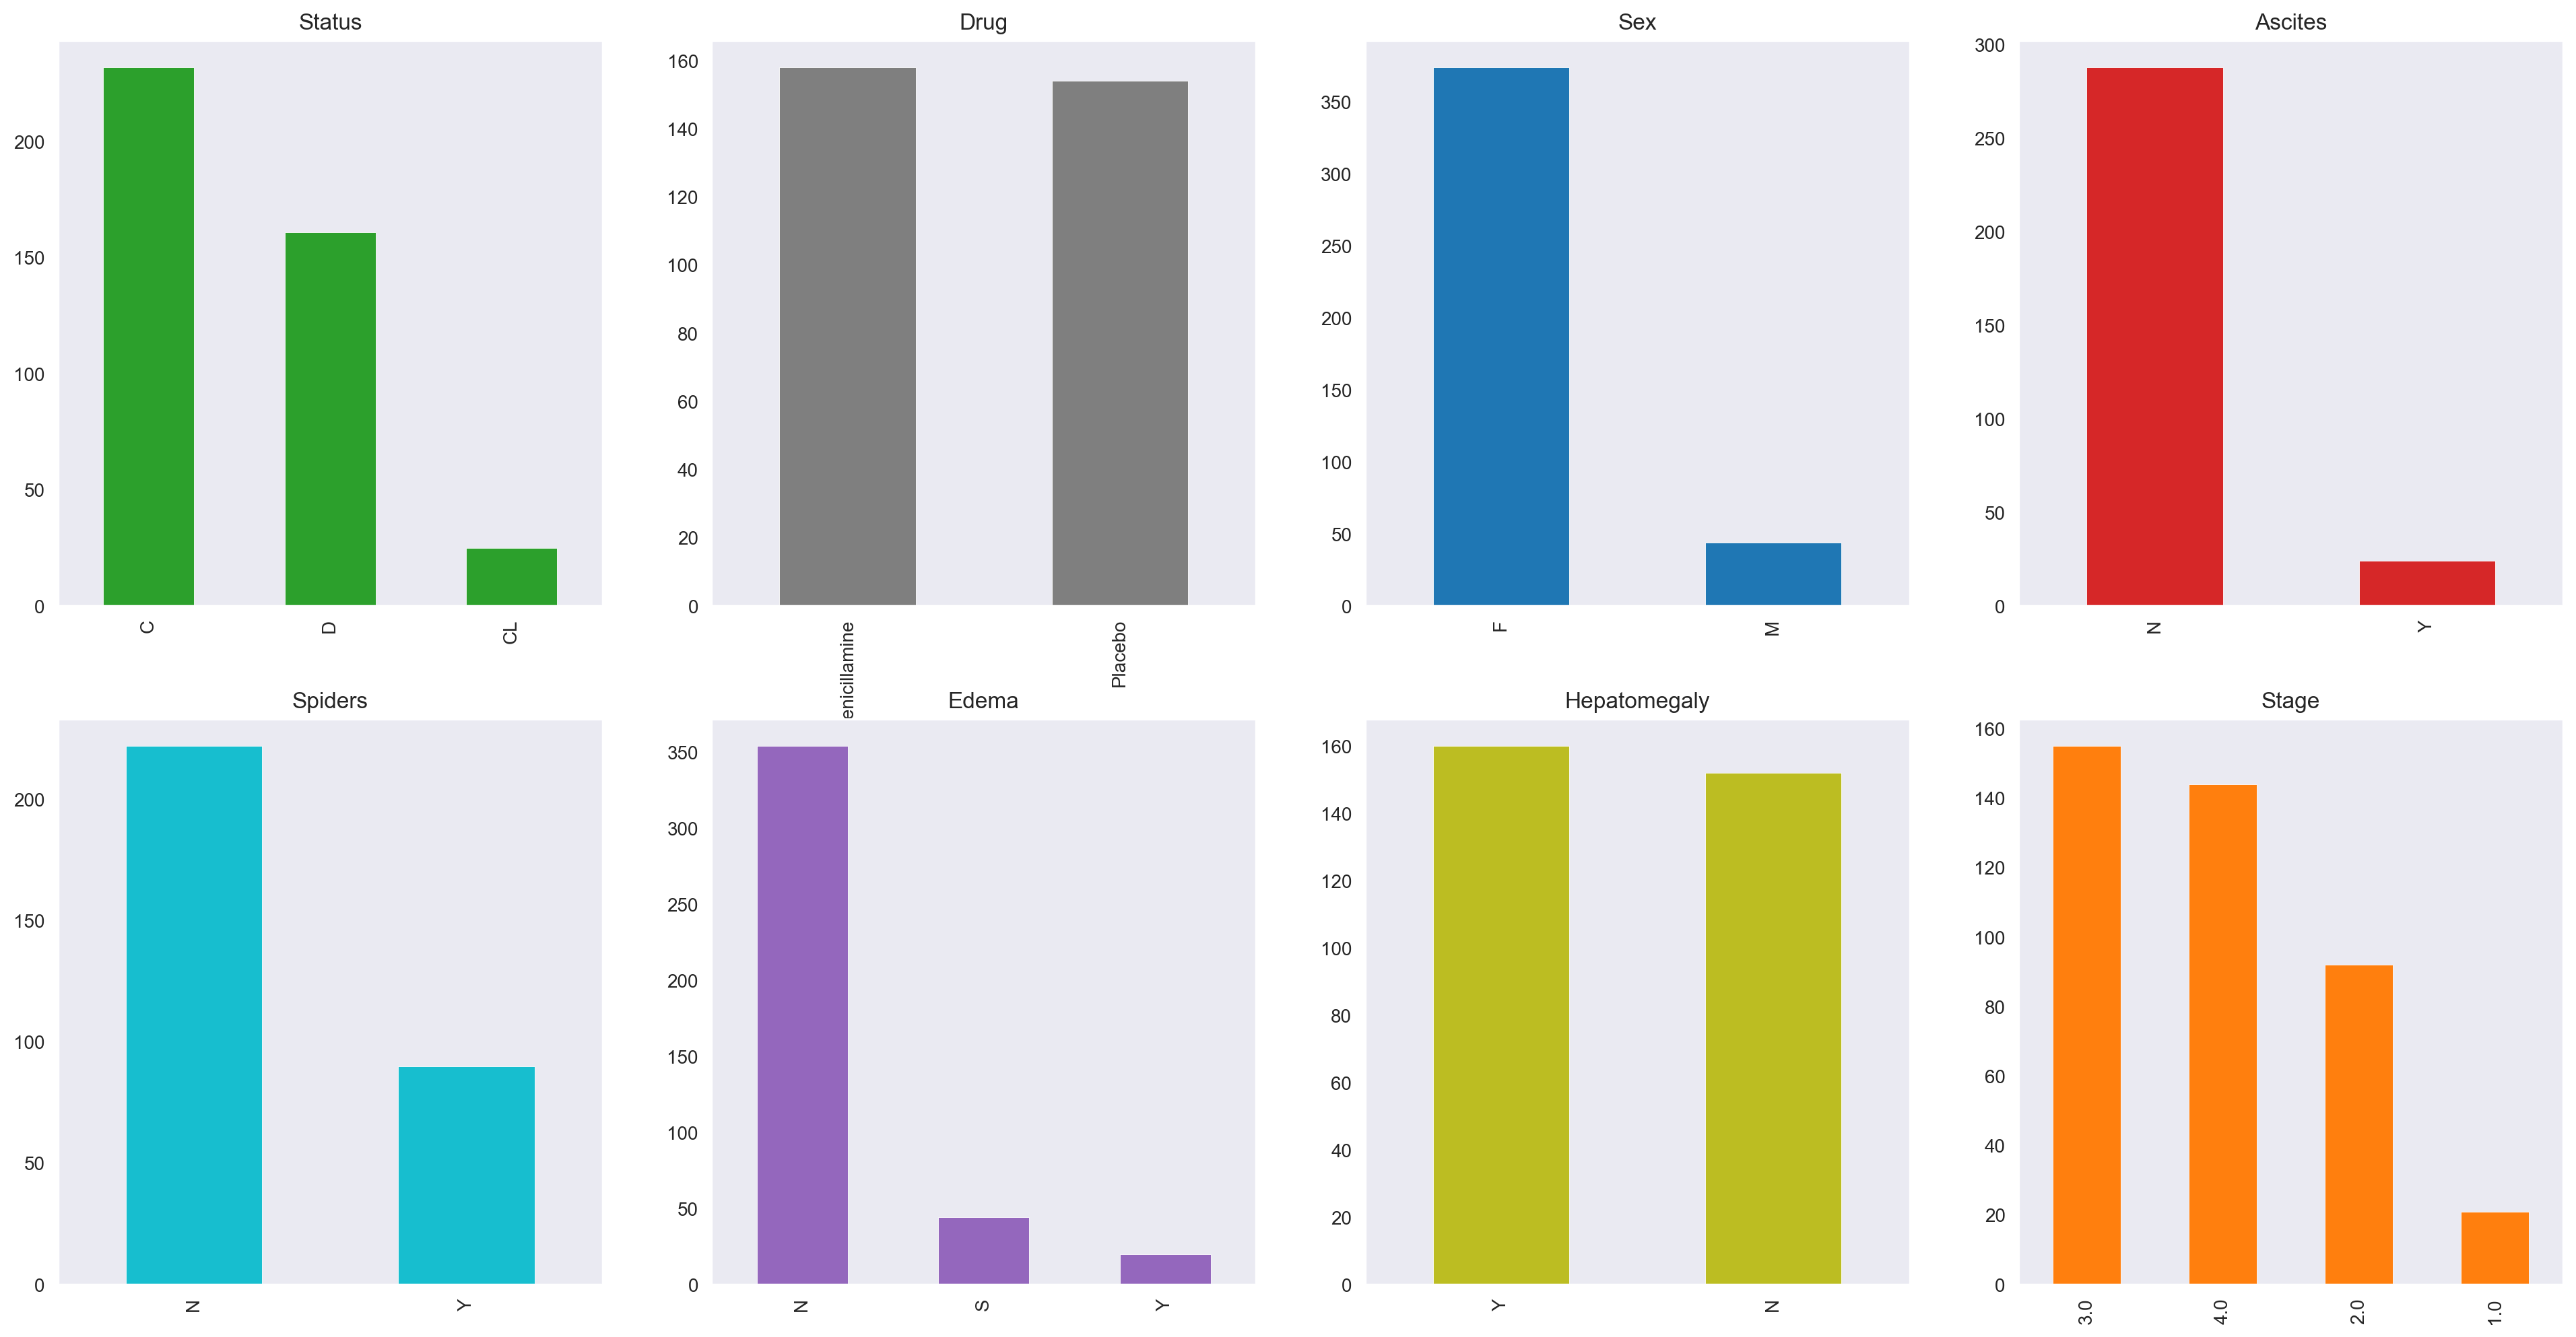

In [13]:
#Organize binary labels into subplots to view value counts of each feature

fig, axes = plt.subplots(nrows = 2, ncols = 4, dpi =200, figsize = (24,12))

df.Status.value_counts().plot(kind = 'bar', color = 'tab:green', title = 'Status', ax =axes[0,0])
df.Drug.value_counts().plot(kind = 'bar', color = 'tab:grey', title = 'Drug', ax =axes[0,1])
df.Sex.value_counts().plot(kind = 'bar', color = 'tab:blue', title = 'Sex', ax =axes[0,2])
df.Ascites.value_counts().plot(kind = 'bar', color = 'tab:red', title = 'Ascites', ax =axes[0,3])

df.Spiders.value_counts().plot(kind='bar', color='tab:cyan', title='Spiders', ax=axes[1,0])
df.Edema.value_counts().plot(kind='bar', color='tab:purple', title='Edema', ax=axes[1,1])
df.Hepatomegaly.value_counts().plot(kind='bar', color='tab:olive', title='Hepatomegaly', ax=axes[1,2])
df.Stage.value_counts().plot(kind='bar', color='tab:orange', title='Stage', ax=axes[1,3]);

In [14]:
# Converting Target categories into intigers 1 for Cirrhosis, 0 otherwise
df['Stage'] = np.where(df['Stage'] == 4,1,0)

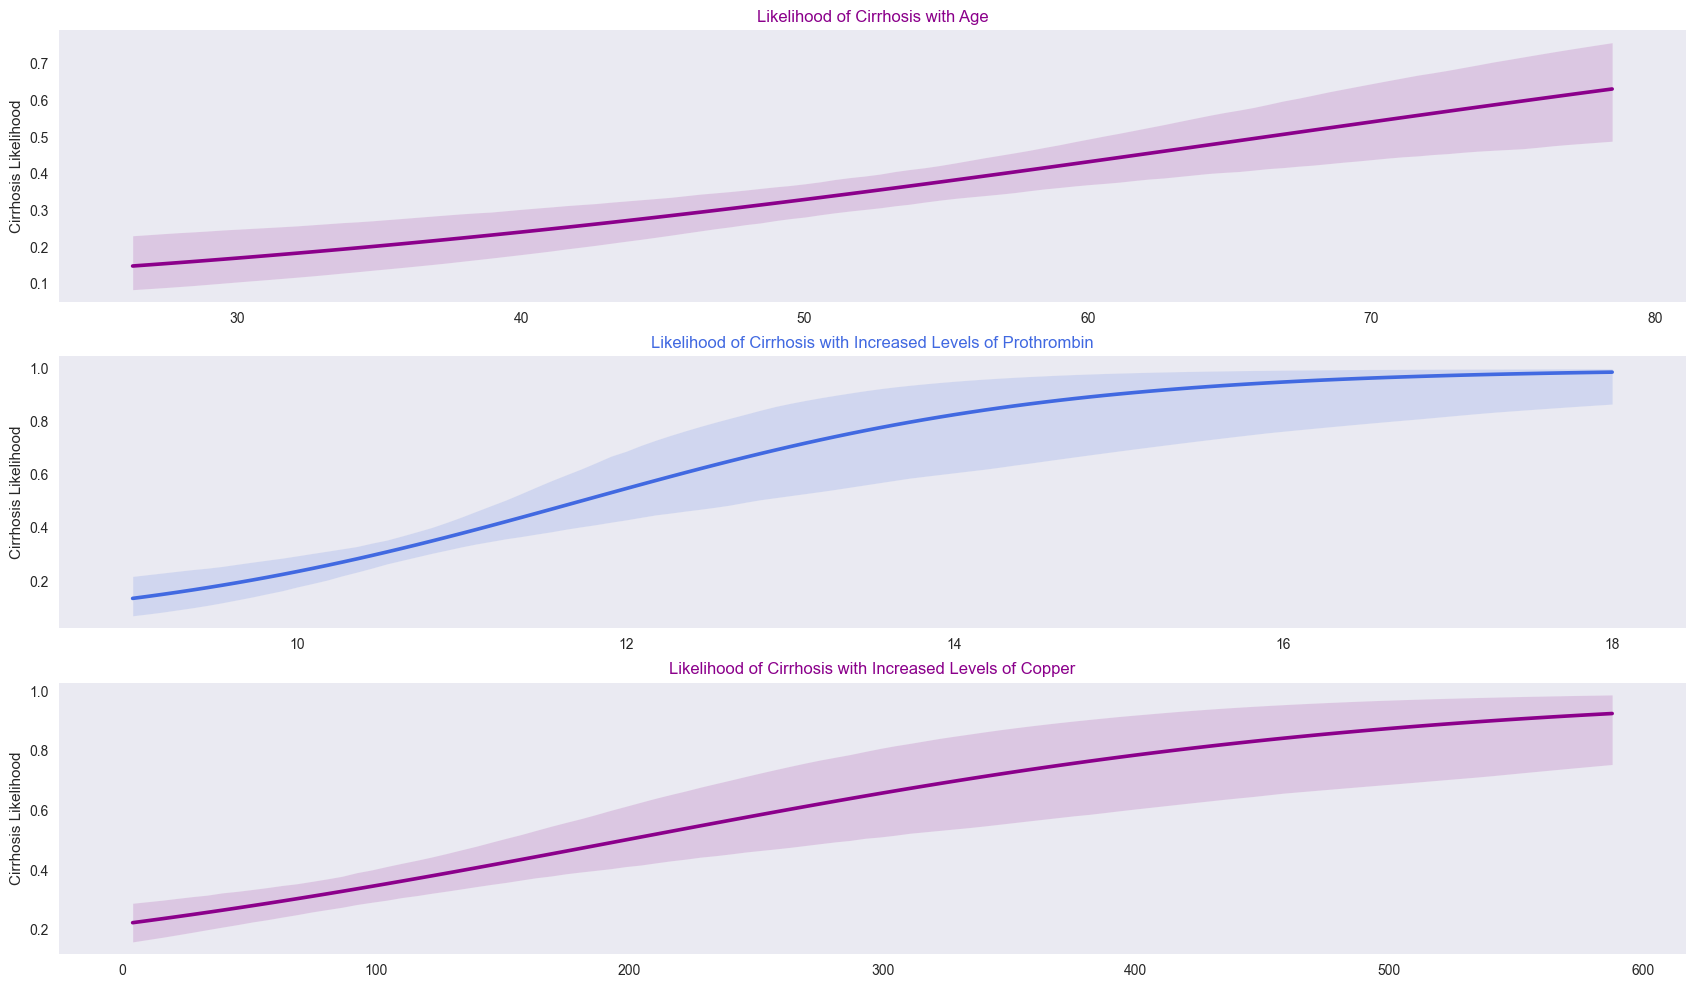

In [15]:
#Regressiion Plots for Positive Correlated Features
plt.figure(figsize= (21,12))

plt.subplot(3,1,1)
sns.regplot(x = df.Age, y=df.Stage, scatter = False, logistic = True, color = 'darkmagenta');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False) ;
plt.xlabel('');
plt.ylabel('Cirrhosis Likelihood');
plt.setp(plt.title('Likelihood of Cirrhosis with Age'), color='darkmagenta') ;

plt.subplot(3,1,2)
sns.regplot(x=df['Prothrombin'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.ylabel('Cirrhosis Likelihood')
plt.setp(plt.title('Likelihood of Cirrhosis with Increased Levels of Prothrombin'), color='royalblue');

plt.subplot(3,1,3)
sns.regplot(x=df.Copper, y=df['Stage'], scatter=False, logistic=True, color='darkmagenta')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.ylabel('Cirrhosis Likelihood')
plt.setp(plt.title('Likelihood of Cirrhosis with Increased Levels of Copper'), color='darkmagenta');

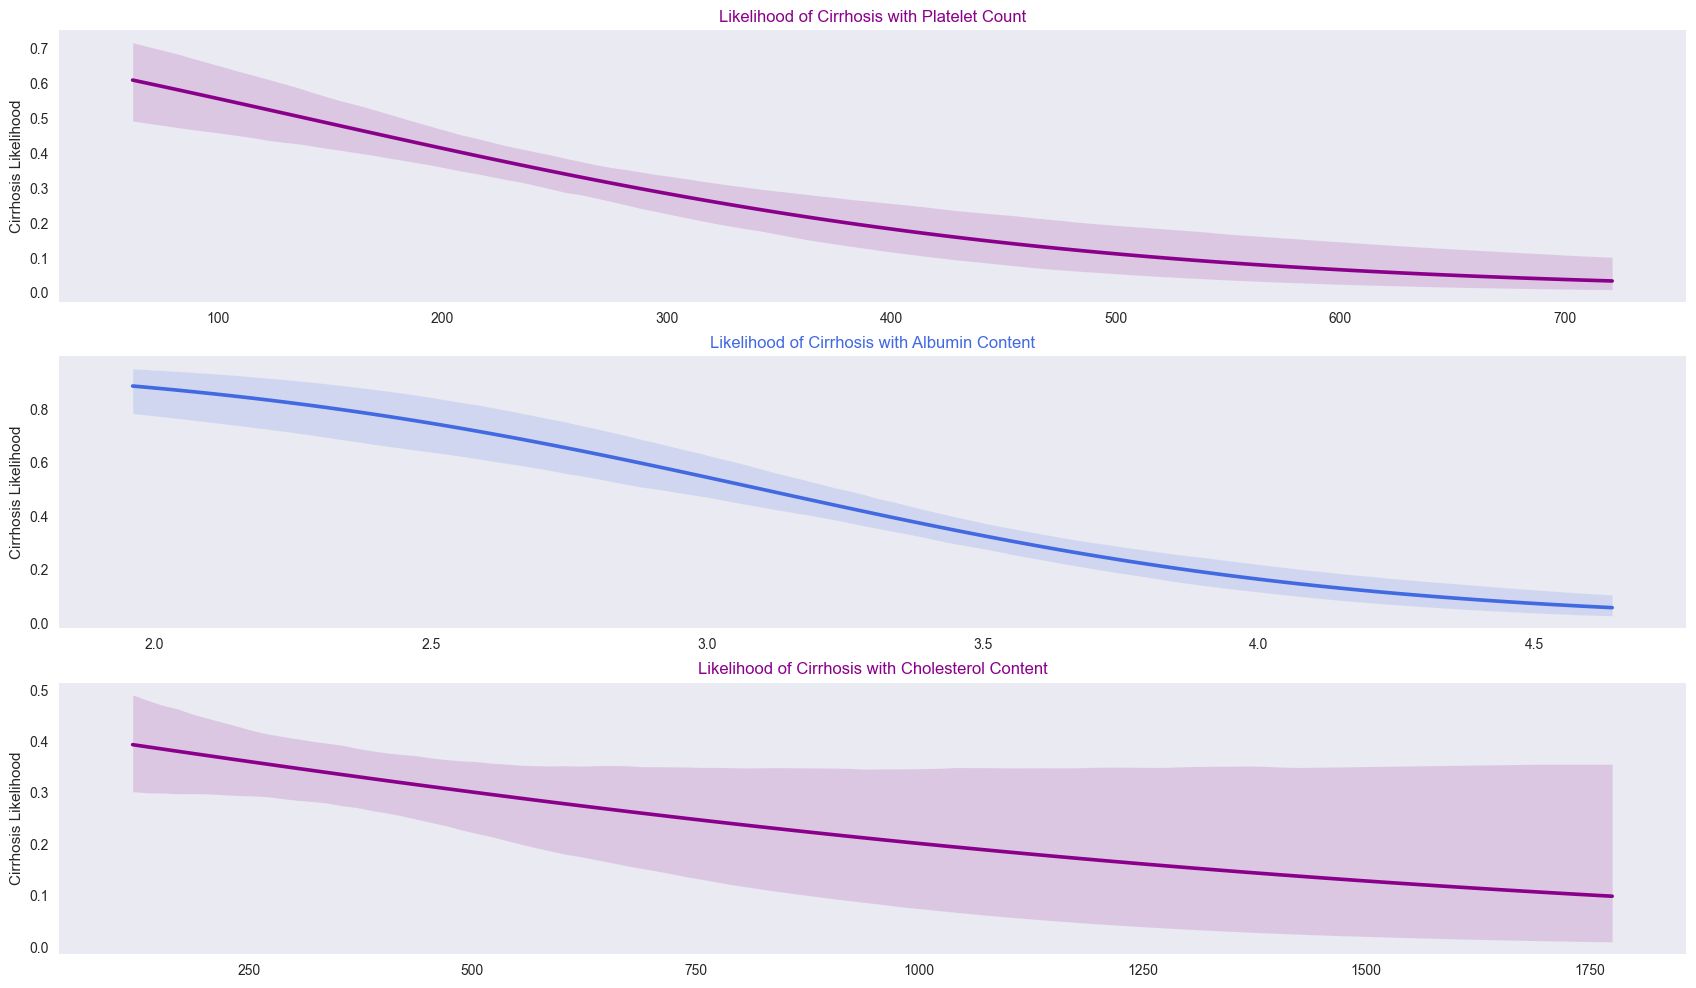

In [16]:
#Regressiion Plots for Negative Correlated Features
plt.figure(figsize= (21,12))

plt.subplot(3,1,1)
sns.regplot(x=df['Platelets'], y=df['Stage'], scatter=False, logistic=True, color='darkmagenta')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Likelihood');
plt.setp(plt.title('Likelihood of Cirrhosis with Platelet Count'), color='darkmagenta');

plt.subplot(3,1,2)
sns.regplot(x=df['Albumin'], y=df['Stage'], scatter=False, logistic=True, color='royalblue');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Likelihood');
plt.setp(plt.title('Likelihood of Cirrhosis with Albumin Content'), color='royalblue');

plt.subplot(3,1,3)
sns.regplot(x=df['Cholesterol'], y=df['Stage'], scatter=False, logistic=True, color='darkmagenta')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Likelihood');
plt.setp(plt.title('Likelihood of Cirrhosis with Cholesterol Content'), color='darkmagenta') ;

### Regression Plot Analysis

As seen in the regression plots above, the development of liver disease has a positive correlation with Age of patient, and increased levels of Prothhrombin and Copper. Converssely, liver disease has a negative correlation with levels of platelet count, cholestrol, and albumin count. This can be confirmed with the patient's doctor and further blood tests. 

In [24]:
df2 = pd.read_csv('cirrhosis.csv')
df2 = df2.drop(['ID','N_Days'],axis=1)

#Missing Value Treatment - Since the dataset is not very large we cannot drop any datasets instead we will be filling the numerical columns with the median and the categorical columns with the mode. This is not always the most highly accurate technique because of the inherent bias that this will create towards the handled features, but for the purposes of this dataset that will be the method that I will use.
numerical_columns = df2.select_dtypes(include = (['int64', 'float64'])).columns
categorical_columns = df2.select_dtypes(include = ('object')).columns

for c in numerical_columns:
    df2[c].fillna(df2[c].median(), inplace = True)

for c in categorical_columns:
    df2[c].fillna(df2[c].mode().values[0], inplace = True)

df2.Stage = df2.Stage.astype(int)

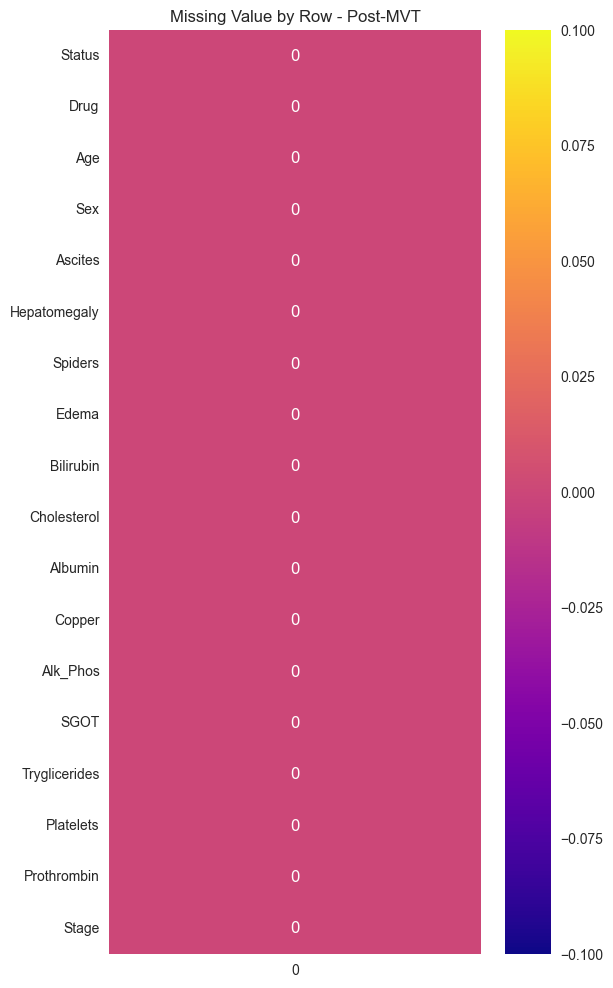

In [25]:
plt.figure(figsize=(6,12))
plt.title('Missing Value by Row - Post-MVT')
ax = sns.heatmap(df2.isna().sum().to_frame(), annot = True, fmt = 'd', cmap = 'plasma')
plt.show()

In [26]:
# Dummy Variables
df2['Sex'] = df2['Sex'].replace({'M':0, 'F':1})
df2['Ascites'] = df2['Ascites'].replace({'N':0, 'Y':1})
df2['Drug'] = df2['Drug'].replace({'D-penicillamine':0, 'Placebo':1})
df2['Hepatomegaly'] = df2['Hepatomegaly'].replace({'N':0, 'Y':1})
df2['Spiders'] = df2['Spiders'].replace({'N':0, 'Y':1})
df2['Edema'] = df2['Edema'].replace({'N':0, 'Y':1, 'S':-1})
df2['Status'] = df2['Status'].replace({'C':0, 'CL':1, 'D':-1})
df2['Age'] = round(df2['Age']/365,0)
df2.head()



,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,-1,0,59.0,1,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,0,0,56.0,1,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,-1,0,70.0,0,0,0,0,-1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,-1,0,55.0,1,0,1,1,-1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,1,1,38.0,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


In [39]:
df2.describe()

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,-0.325359,0.368421,50.772727,0.894737,0.057416,0.636364,0.215311,-0.057416,3.220813,350.272727,3.497440,91.279904,1799.144976,120.564067,119.267943,256.866029,10.731100
std,0.583036,0.482954,10.442880,0.307260,0.232915,0.481622,0.411530,0.387521,4.407506,193.123893,0.424972,74.485481,1875.121982,49.085094,54.050691,97.024861,1.019587
min,-1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,-1.000000,0.000000,43.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000
50%,0.000000,0.000000,51.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000
75%,0.000000,1.000000,58.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.400000,347.750000,3.770000,100.750000,1707.750000,135.750000,127.750000,315.500000,11.100000
max,1.000000,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


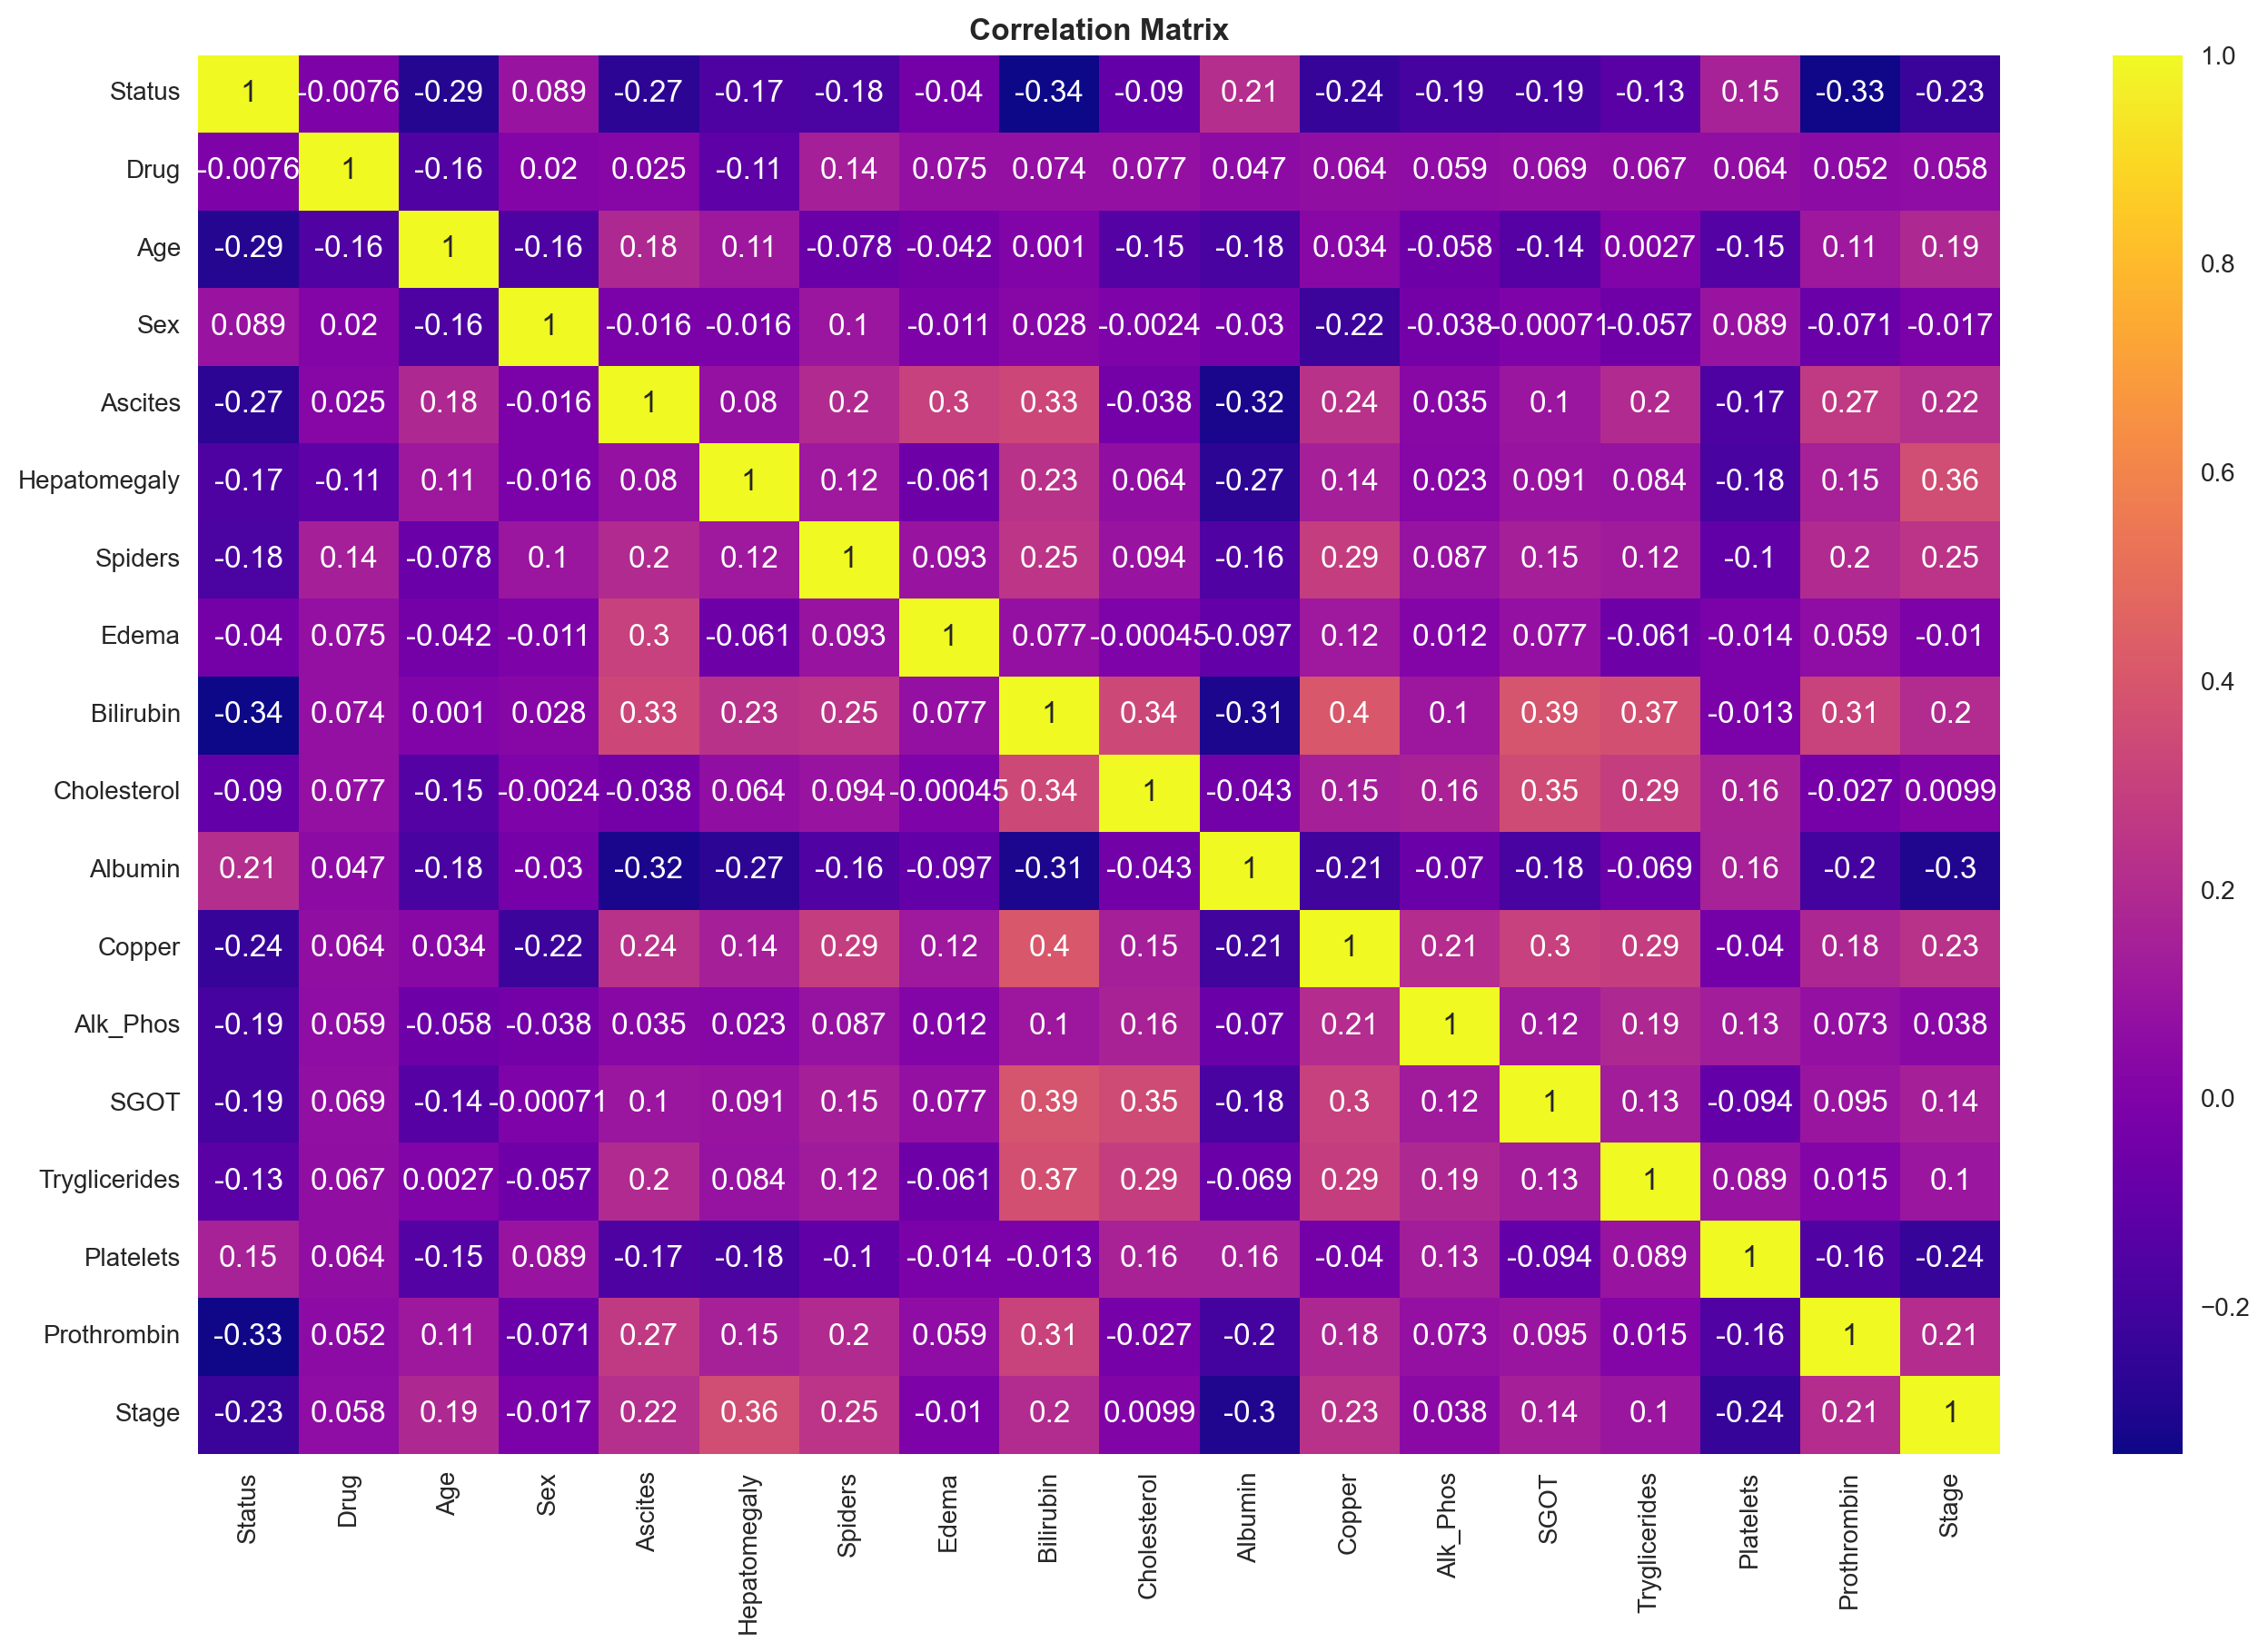

In [27]:
plt.figure(figsize = (16,10), dpi=200)
ax = plt.axes()
sns.heatmap(df2.corr(), annot = True, cmap='plasma', ax=ax)
ax.set_title('Correlation Matrix', weight='bold')
plt.show()


**As we can see from this initial correlation matrix, Hepatomegaly has the highest correlation ratio with the stage of cirrhosis which can allow us to infer that it is a good indication of liver cirrhosis severity in the body.**

Text(0.5, 1.0, 'Cirrhosis Stages for Trial Participants')

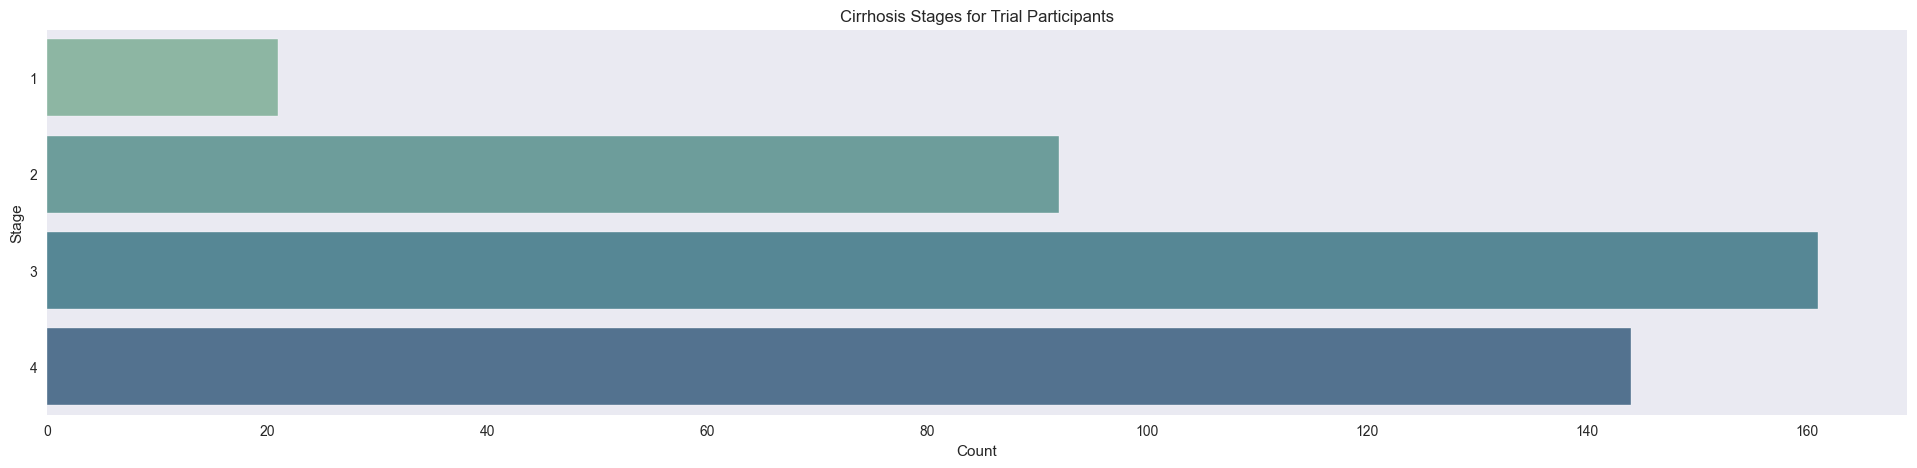

In [28]:
plt.figure(figsize = (24,5))
sns.countplot( y = df2['Stage'], palette = 'crest', alpha = 0.8)
sns.despine(top =True, right =True, bottom = True, left =True)
plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False)
plt.xlabel('Count')
plt.title('Cirrhosis Stages for Trial Participants')

In [30]:
X = df2.drop(['Status', 'Stage'], axis=1)
y = df2.pop('Stage')

In [31]:
# Upsampling Data
sm = SMOTE(k_neighbors = 3)
X, y = sm.fit_resample(X, y)

# Scaling Data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [32]:
#split the data into a training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

### 3. Perform Further Exploratory Data Analysis (EDA) to note interesting patterns in the dataset.

 **Having more samples of one class against any of the others, can result in inconsistent sampliing which will affect the accuracy. We can fix this with including more samples.**

**Per our inferences, we can see that Copper Accumulation, Age, and Prothrombin increase the likelihood of Liver Cirrhosis.**

### 4. Modeling Data

In [33]:
#Create Accuracy Score plot for

def visualize_scores(score):

    names = ['SVM', 'Decision Tree' , 'Random Forest' , 'Logistic Regression' , 'AdaBoost' , 'KNN']

    plt.rcParams['figure.figsize'] = 20,8
    ax = sns.barplot(x =names, y = score, palette = 'plasma', saturation = 1.0)
    plt.xlabel('Model Type', fontsize = 8)
    plt.ylabel('Accuracy (%)', fontsize = 8)
    plt.title('Accuracy Results from Model Training and Valiidion Tests', fontsize =30)
    plt.xticks(fontsize = 10, horizontalalignment = 'right', rotation = 6)
    plt.yticks(fontsize = 10)

    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x,y = i.get_xy()
        ax.annotate(f'{round(height,2)}%',(x+width/2 , y +height * 1.01), ha = 'center', fontsize = 'large')
        plt.show()

In [34]:
def trainer(X_train, y_train, X_test, y_test):

    models = [[' SVM ', SVC()],
              [' Decision Tree ', DecisionTreeClassifier()],
              [' Random Forest ', RandomForestClassifier()],
              [' Logistic Regression ', LogisticRegression(max_iter = 200)],
              [' AdaBoost ', AdaBoostClassifier()],
              [' KNN ', KNeighborsClassifier()],
        ]

    scores = []

    for model_name, model in models:

        model = model
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        cm = confusion_matrix(y_test, pred)
        scores.append(accuracy_score(y_test, model.predict(X_test)))

        print(Back.BLUE + Fore.BLACK + Style.BRIGHT + model_name)
        print(Back.RESET)
        print(cm)
        print('\n' + Fore.BLUE + 'Training Accuracy: ' + Fore.GREEN + str(round(accuracy_score(y_train, model.predict(X_train)) * 100, 2)) + '%')
        print('\n' + Fore.BLUE + 'Validation Accuracy: ' + Fore.GREEN + str(round(accuracy_score(y_test, model.predict(X_test)) * 100, 2)) + '%')
        print(Fore.GREEN + classification_report(y_test, pred))

        visualizer = ROCAUC(model)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test,y_test)
        visualizer.show()

        print('\n' + Fore.BLACK + Back.WHITE + '****************************************\n')


    return scores

 SVM 

[[29  1  2  0]
 [ 5 13 10  4]
 [ 2  7 11  6]
 [ 2  6  6 25]]

Training Accuracy: 76.5%

Validation Accuracy: 60.47%
              precision    recall  f1-score   support

           1       0.76      0.91      0.83        32
           2       0.48      0.41      0.44        32
           3       0.38      0.42      0.40        26
           4       0.71      0.64      0.68        39

    accuracy                           0.60       129
   macro avg       0.58      0.59      0.59       129
weighted avg       0.60      0.60      0.60       129



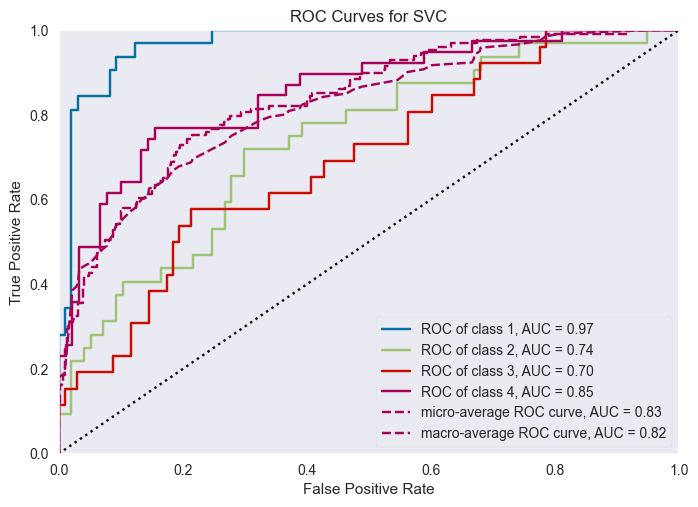


****************************************

 Decision Tree 

[[28  2  2  0]
 [ 6 13  8  5]
 [ 4  6 11  5]
 [ 3  9 11 16]]

Training Accuracy: 100.0%

Validation Accuracy: 52.71%
              precision    recall  f1-score   support

           1       0.68      0.88      0.77        32
           2       0.43      0.41      0.42        32
           3       0.34      0.42      0.38        26
           4       0.62      0.41      0.49        39

    accuracy                           0.53       129
   macro avg       0.52      0.53      0.51       129
weighted avg       0.53      0.53      0.52       129



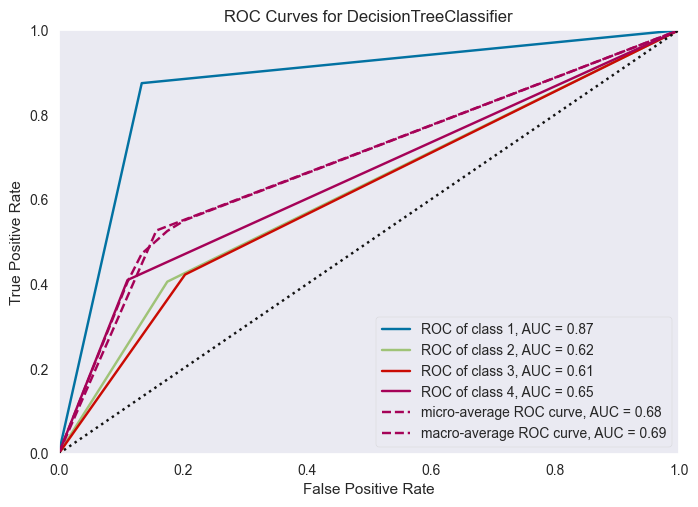


****************************************

 Random Forest 

[[32  0  0  0]
 [ 3 20  8  1]
 [ 2  5 13  6]
 [ 1  6  6 26]]

Training Accuracy: 100.0%

Validation Accuracy: 70.54%
              precision    recall  f1-score   support

           1       0.84      1.00      0.91        32
           2       0.65      0.62      0.63        32
           3       0.48      0.50      0.49        26
           4       0.79      0.67      0.72        39

    accuracy                           0.71       129
   macro avg       0.69      0.70      0.69       129
weighted avg       0.70      0.71      0.70       129



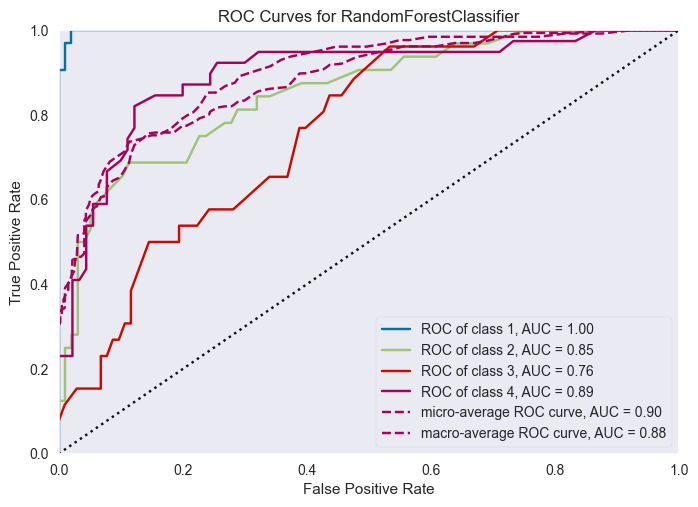


****************************************

 Logistic Regression 

[[26  5  1  0]
 [ 9 12  9  2]
 [ 2  8 11  5]
 [ 1  5  8 25]]

Training Accuracy: 57.86%

Validation Accuracy: 57.36%
              precision    recall  f1-score   support

           1       0.68      0.81      0.74        32
           2       0.40      0.38      0.39        32
           3       0.38      0.42      0.40        26
           4       0.78      0.64      0.70        39

    accuracy                           0.57       129
   macro avg       0.56      0.56      0.56       129
weighted avg       0.58      0.57      0.57       129



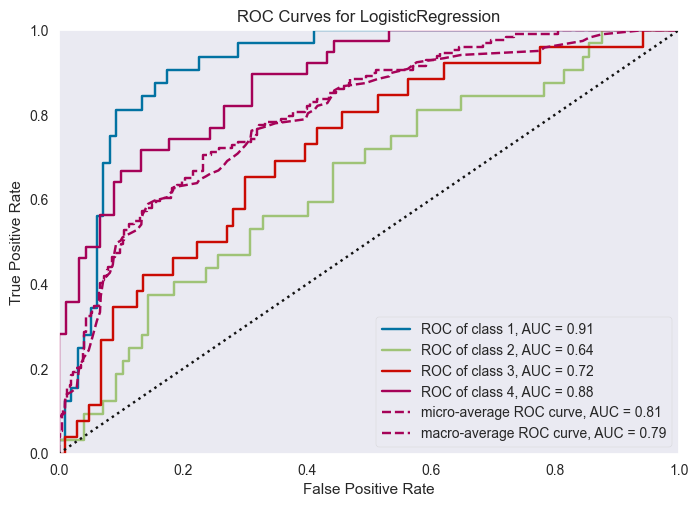


****************************************

 AdaBoost 

[[22  9  1  0]
 [ 4 13 10  5]
 [ 3  8  6  9]
 [ 2  5 12 20]]

Training Accuracy: 59.03%

Validation Accuracy: 47.29%
              precision    recall  f1-score   support

           1       0.71      0.69      0.70        32
           2       0.37      0.41      0.39        32
           3       0.21      0.23      0.22        26
           4       0.59      0.51      0.55        39

    accuracy                           0.47       129
   macro avg       0.47      0.46      0.46       129
weighted avg       0.49      0.47      0.48       129



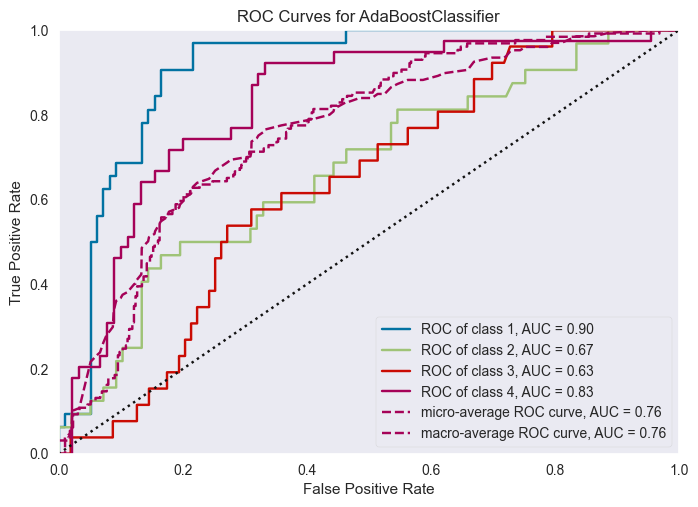


****************************************

 KNN 

[[31  1  0  0]
 [10  9 11  2]
 [ 3  8 11  4]
 [ 2  6  6 25]]

Training Accuracy: 71.84%

Validation Accuracy: 58.91%
              precision    recall  f1-score   support

           1       0.67      0.97      0.79        32
           2       0.38      0.28      0.32        32
           3       0.39      0.42      0.41        26
           4       0.81      0.64      0.71        39

    accuracy                           0.59       129
   macro avg       0.56      0.58      0.56       129
weighted avg       0.58      0.59      0.57       129



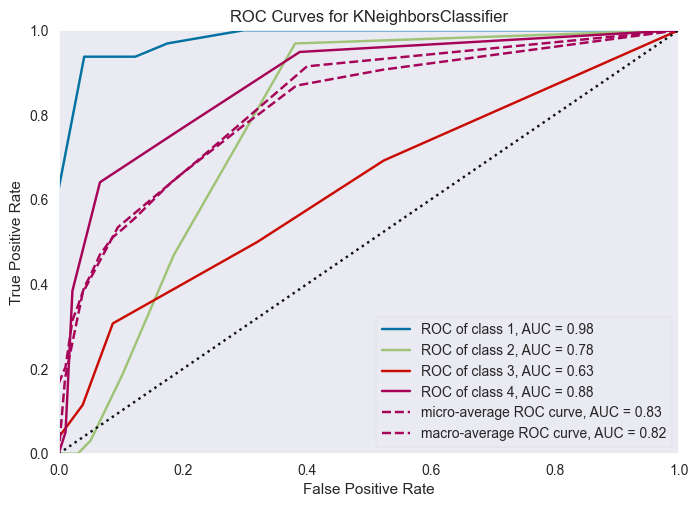


****************************************



In [35]:
scores = trainer(X_train, y_train, X_test, y_test)

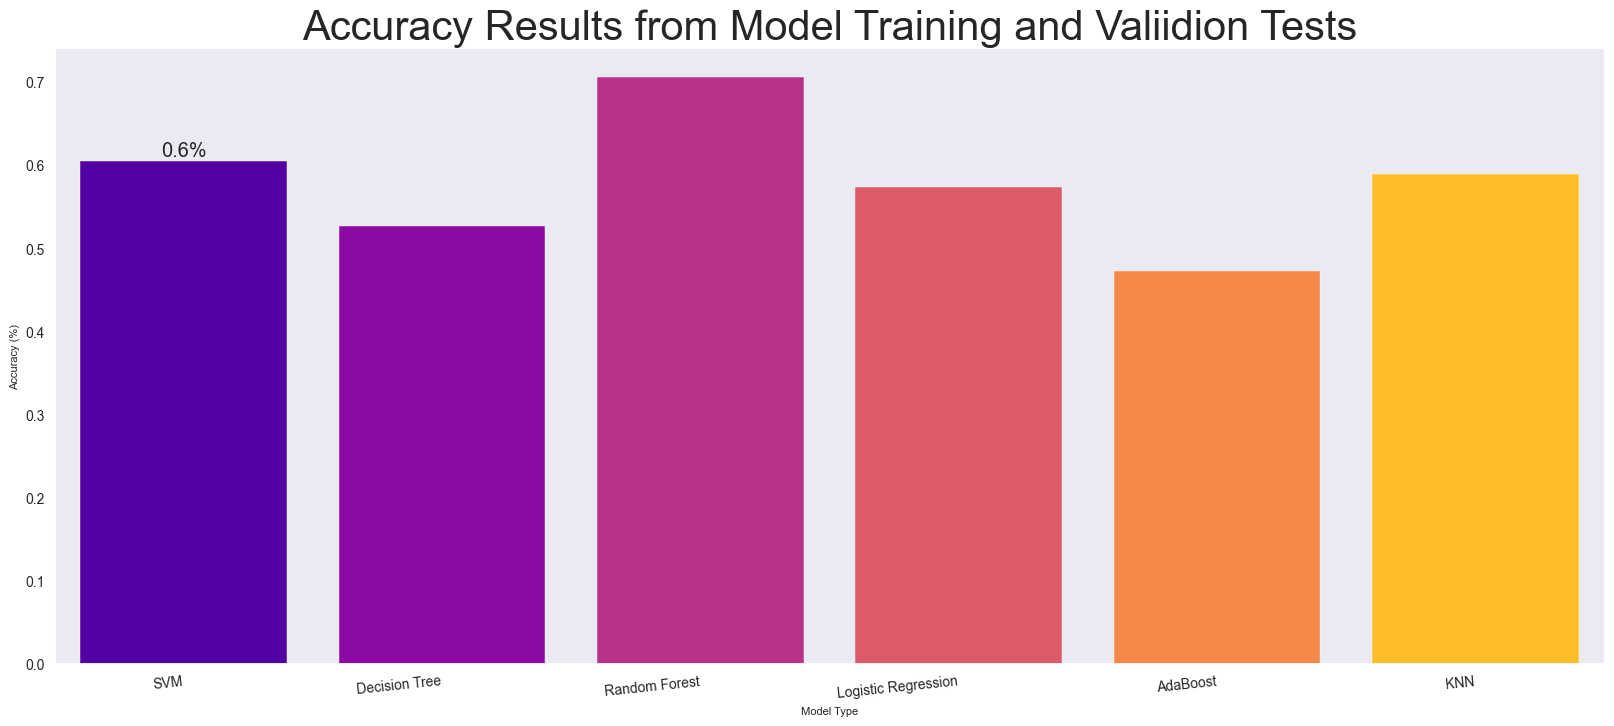

In [36]:
visualize_scores(scores)

Based on the performance described in the models, Random Forest is comparatively the best algorithm to apply with an accuracy of 70%. While this is not great, it will provide us with a starting point for  Considering that there are only 480 samples, I believe this accuracy is good for the amount of training data that we have and will be improved with further testing. 

**IDEAS ON HOW TO IMPROVE PERFORMANCE:**
- More data points for learning
- Training using a boosting method that may assist in generating additional random samples for testinig
- Using a deep learning Neural Network to process the dataset. 

### 5. Save Model as Pickle File and Prepare to Deploy

In [37]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
scores.append(accuracy_score(y_test, model.predict(X_test)))


In [38]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))